In [3]:
#This example uses Python 3.9 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '01cdb442-7c9f-4442-8bc0-cfd400615736',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = response.json()
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
    
    


{'status': {'timestamp': '2023-05-17T07:59:35.476Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9679}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10208, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)
import pandas as pd



pd.set_option('display.max_columns', None)



In [5]:

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937576e+07,1.937576e+07,False,NaN,1,NaN,NaN,None,2023-05-17T07:57:00.000Z,26845.069265,1.242663e+10,-2.5369,-0.582983,-1.443768,-2.613980,-10.127106,-2.073496,9.213915,5.201437e+11,46.3267,5.637465e+11,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
1,1027,Ethereum,ETH,ethereum,6898,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202822e+08,1.202822e+08,True,NaN,2,NaN,NaN,None,2023-05-17T07:57:00.000Z,1807.467938,5.218468e+09,-9.9664,-0.633129,-0.782501,-1.756430,-13.577985,-0.591189,7.578418,2.174062e+11,19.3633,2.174062e+11,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
2,825,Tether,USDT,tether,53460,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284543e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-17T07:57:00.000Z,1.000178,1.976937e+10,0.3322,-0.006632,-0.009536,-0.025190,-0.028922,-0.233786,-0.007000,8.286019e+10,7.3800,8.610597e+10,None,2023-05-17T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-17 07:59:38.575692+00:00
3,1839,BNB,BNB,bnb,1365,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558593e+08,1.558593e+08,False,NaN,4,NaN,NaN,None,2023-05-17T07:57:00.000Z,309.544030,4.037241e+08,-3.8277,-0.363671,-1.141273,-0.816064,-10.151290,-10.317043,-3.170222,4.824532e+10,4.2988,4.824532e+10,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
4,3408,USD Coin,USDC,usd-coin,12427,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.965699e+10,2.965699e+10,False,NaN,5,NaN,NaN,None,2023-05-17T07:57:00.000Z,0.999993,2.713064e+09,-3.5945,-0.007544,0.002912,-0.002720,0.020096,0.013279,-0.001288,2.965677e+10,2.6414,2.965677e+10,None,2023-05-17T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-17 07:59:38.575692+00:00
5,52,XRP,XRP,xrp,946,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-17T07:57:00.000Z,0.448365,1.399746e+09,97.6261,-0.073614,5.155491,4.906025,-12.705198,17.142612,12.220568,2.324227e+10,2.0701,4.483651e+10,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
6,2010,Cardano,ADA,cardano,787,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485254e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-17T07:57:00.000Z,0.367371,1.767483e+08,4.7121,-0.507119,-0.319623,1.350899,-16.447155,4.236883,-9.616290,1.280381e+10,1.1404,1.653169e+10,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393790e+11,1.393790e+11,True,NaN,8,NaN,NaN,None,2023-05-17T07:57:00.000Z,0.072669,1.924768e+08,3.9938,-0.068776,0.591520,-0.534170,-21.219678,-6.685093,-18.256895,1.012856e+10,0.9021,1.012856e+10,None,2023-05-17T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 07:59:38.575692+00:00
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, 

In [6]:
import os
import pandas as pd
from time import time, sleep
from requests import Session

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '01cdb442-7c9f-4442-8bc0-cfd400615736',
    }
    
    session = Session()
    session.headers.update(headers)
    
    df2 = pd.DataFrame()
    
    try:
        response = session.get(url, params=parameters)
        data = response.json()
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now', utc=True)
        df = pd.concat([df, df2])
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    if not os.path.isfile(r'E:\Programowanie\Projekty\API\API.csv'):
        df.to_csv(r'E:\Programowanie\Projekty\API\API.csv', header = 'column_names')
        
    else:
        df.to_csv(r'E:\Programowanie\Projekty\API\API.csv', mode ='a', header = False)
        
        

In [7]:
df = pd.DataFrame()
for i in range(333):
    api_runner()
    print('API completed')
    sleep(30)
    
exit()

API completed
API completed
API completed
API completed
API completed
API completed


KeyboardInterrupt: 

In [9]:
df3 = pd.read_csv(r'E:\Programowanie\Projekty\API\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.937492e+07,1.937492e+07,False,NaN,1,NaN,NaN,NaN,2023-05-16T11:51:00.000Z,27097.209219,1.311941e+10,-2.6395,0.246592,-0.958851,-2.193181,-10.454223,0.835712,20.648287,5.250062e+11,46.5920,5.690414e+11,NaN,2023-05-16T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 11:53:35.804492+00:00
1,1,1027,Ethereum,ETH,ethereum,6890,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202870e+08,1.202870e+08,True,NaN,2,NaN,NaN,NaN,2023-05-16T11:51:00.000Z,1818.928371,5.865792e+09,-7.4951,0.296687,-0.421346,-1.615268,-12.901542,3.516105,15.748199,2.187934e+11,19.4054,2.187934e+11,NaN,2023-05-16T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 11:53:35.804492+00:00
2,2,825,Tether,USDT,tether,53417,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.282263e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-16T11:51:00.000Z,1.000275,2.006593e+10,-0.5713,-0.023146,-0.001206,-0.030560,-0.009485,-0.240825,-0.010746,8.284543e+10,7.3478,8.611434e+10,NaN,2023-05-16T11:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-16 11:53:35.804492+00:00
3,3,1839,BNB,BNB,bnb,1364,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558595e+08,1.558595e+08,False,NaN,4,NaN,NaN,NaN,2023-05-16T11:51:00.000Z,311.136203,4.253018e+08,-1.3905,0.063607,-1.305487,-1.169808,-6.890801,-7.199529,3.321659,4.849353e+10,4.3011,4.849353e+10,NaN,2023-05-16T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 11:53:35.804492+00:00
4,4,3408,USD Coin,USDC,usd-coin,12417,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.980314e+10,2.980314e+10,False,NaN,5,NaN,NaN,NaN,2023-05-16T11:51:00.000Z,0.999928,2.857893e+09,0.1566,-0.014368,-0.015042,-0.007406,0.044379,-0.011076,-0.021598,2.980098e+10,2.6431,2.980098e+10,NaN,2023-05-16T11:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-16 11:53:35.804492+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,10,2,Litecoin,LTC,litecoin,910,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.293755e+07,8.400000e+07,False,NaN,11,NaN,NaN,NaN,2023-05-17T08:00:00.000Z,91.539555,8.667977e+08,19.7538,-0.851986,3.205143,15.406555,-7.532736,5.757906,-9.457451,6.676671e+09,0.5947,7.689323e+09,NaN,2023-05-17T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 08:02:25.646315+00:00
626,11,1958,TRON,TRX,tron,756,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,9.040646e+10,9.040647e+10,True,NaN,12,7.165966e+10,5.066475e+09,NaN,2023-05-17T08:00:00.000Z,0.070702,1.697693e+08,-1.7923,-0.185335,0.221041,1.889611,6.621626,5.015859,0.163736,6.391910e+09,0.5693,6.391911e+09,NaN,2023-05-17T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 08:02:25.646315+00:00
627,12,6636,Polkadot,DOT,polkadot-new,500,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.184464e+09,1.313943e+09,True,NaN,13,NaN,NaN,NaN,2023-05-17T08:00:00.000Z,5.297294,9.561097e+07,-6.6665,-0.525816,-0.088064,-0.631466,-21.085362,-20.395695,-19.665053

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.548,-1.454,-2.578,-10.073,-2.097,9.229
Ethereum,-0.585,-0.777,-1.704,-13.539,-0.597,7.610
Tether,0.001,-0.013,-0.026,-0.014,-0.245,-0.002
BNB,-0.345,-1.115,-0.795,-10.150,-10.290,-3.212
USD Coin,0.004,0.008,0.002,0.040,0.001,0.002
XRP,0.112,5.328,5.078,-12.563,17.248,12.331
Cardano,-0.567,-0.392,1.292,-16.520,4.104,-9.686
Dogecoin,-0.113,0.572,-0.504,-21.823,-6.774,-18.325
Solana,-0.725,-2.219,-0.045,-18.119,-7.327,-13.078


In [12]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.548
           quote.USD.percent_change_24h    -1.454
           quote.USD.percent_change_7d     -2.578
           quote.USD.percent_change_30d   -10.073
           quote.USD.percent_change_60d    -2.097
                                            ...  
Shiba Inu  quote.USD.percent_change_24h    -1.129
           quote.USD.percent_change_7d     -2.204
           quote.USD.percent_change_30d   -24.948
           quote.USD.percent_change_60d   -22.719
           quote.USD.percent_change_90d   -36.431
Length: 90, dtype: float64

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin   quote.USD.percent_change_1h   -0.548
          quote.USD.percent_change_24h  -1.454
          quote.USD.percent_change_7d   -2.578
          quote.USD.percent_change_30d -10.073
          quote.USD.percent_change_60d  -2.097
...                                        ...
Shiba Inu quote.USD.percent_change_24h  -1.129
          quote.USD.percent_change_7d   -2.204
          quote.USD.percent_change_30d -24.948
          quote.USD.percent_change_60d -22.719
          quote.USD.percent_change_90d -36.431

[90 rows x 1 columns]

In [14]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.548
1,Bitcoin,quote.USD.percent_change_24h,-1.454
2,Bitcoin,quote.USD.percent_change_7d,-2.578
3,Bitcoin,quote.USD.percent_change_30d,-10.073
4,Bitcoin,quote.USD.percent_change_60d,-2.097
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-1.129
86,Shiba Inu,quote.USD.percent_change_7d,-2.204
87,Shiba Inu,quote.USD.percent_change_30d,-24.948
88,Shiba Inu,quote.USD.percent_change_60d,-22.719


In [15]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.548
1,Bitcoin,24h,-1.454
2,Bitcoin,7d,-2.578
3,Bitcoin,30d,-10.073
4,Bitcoin,60d,-2.097
...,...,...,...
85,Shiba Inu,24h,-1.129
86,Shiba Inu,7d,-2.204
87,Shiba Inu,30d,-24.948
88,Shiba Inu,60d,-22.719


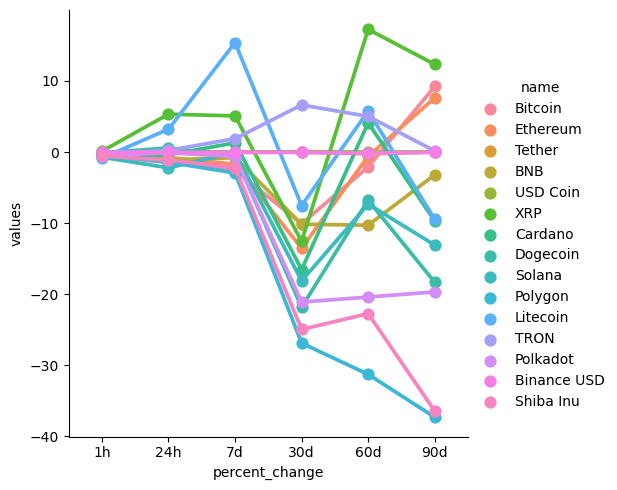

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name =='Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,26846.025,2023-05-17 07:59:54.535411+00:00
0,Bitcoin,26846.025,2023-05-17 08:00:24.749738+00:00
0,Bitcoin,26859.975,2023-05-17 08:00:54.973276+00:00
0,Bitcoin,26859.975,2023-05-17 08:01:25.183433+00:00
0,Bitcoin,26854.895,2023-05-17 08:01:55.415656+00:00
0,Bitcoin,26854.895,2023-05-17 08:02:25.646315+00:00


<Axes: xlabel='timestamp', ylabel='name'>

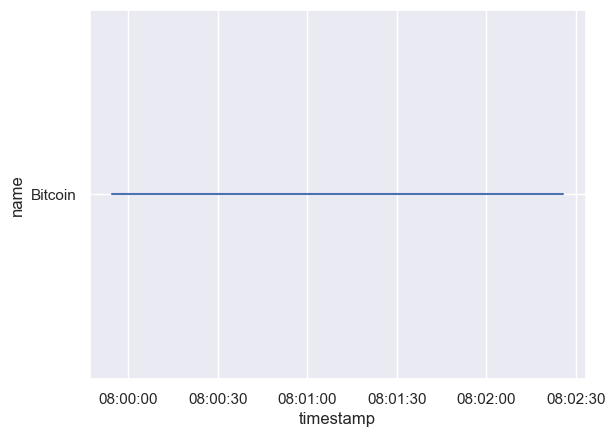

In [24]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='name', data=df9)